In [1]:
import pandas as pd
import numpy as np

from analyze_src.basic_data_inspection import DataInspector, DataTypesInspectionStrategy, SummaryStatisticsInspectionStrategy
from analyze_src.missing_values_analysis import SimpleMissingValuesAnalysis
from analyze_src.univariate_analysis import UnivariateAnalysis, NumericalUnivariateAnalysis, CategoricalUnivariateAnalysis  
from analyze_src.bivariate_analysis import BivariateAnalysis, NumericalVsNumericalAnalysis, CategoricalVsNumericalAnalysis
from analyze_src.multivariate_analysis import SimpleMultivariateAnalysis

# Set display options for better readability
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 100)

In [2]:
df = pd.read_csv('C:/Users/LAKSHYA PALIWAL/Projects/extracted_data/CarPrice_Assignment.csv')

In [3]:
df.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,enginetype,cylindernumber,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823,ohcv,six,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,54.3,2337,ohc,four,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,54.3,2824,ohc,five,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [4]:
inspector = DataInspector(DataTypesInspectionStrategy())
inspector.inspect_data(df)


Data Types and Non-null Counts:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   car_ID            205 non-null    int64  
 1   symboling         205 non-null    int64  
 2   CarName           205 non-null    object 
 3   fueltype          205 non-null    object 
 4   aspiration        205 non-null    object 
 5   doornumber        205 non-null    object 
 6   carbody           205 non-null    object 
 7   drivewheel        205 non-null    object 
 8   enginelocation    205 non-null    object 
 9   wheelbase         205 non-null    float64
 10  carlength         205 non-null    float64
 11  carwidth          205 non-null    float64
 12  carheight         205 non-null    float64
 13  curbweight        205 non-null    int64  
 14  enginetype        205 non-null    object 
 15  cylindernumber    205 non-null    object 
 16  enginesize 

In [5]:
inspector.set_strategy(SummaryStatisticsInspectionStrategy())
inspector.inspect_data(df)


Summary Statistics (Numerical Features):
           car_ID   symboling   wheelbase   carlength    carwidth   carheight  \
count  205.000000  205.000000  205.000000  205.000000  205.000000  205.000000   
mean   103.000000    0.834146   98.756585  174.049268   65.907805   53.724878   
std     59.322565    1.245307    6.021776   12.337289    2.145204    2.443522   
min      1.000000   -2.000000   86.600000  141.100000   60.300000   47.800000   
25%     52.000000    0.000000   94.500000  166.300000   64.100000   52.000000   
50%    103.000000    1.000000   97.000000  173.200000   65.500000   54.100000   
75%    154.000000    2.000000  102.400000  183.100000   66.900000   55.500000   
max    205.000000    3.000000  120.900000  208.100000   72.300000   59.800000   

        curbweight  enginesize   boreratio      stroke  compressionratio  \
count   205.000000  205.000000  205.000000  205.000000        205.000000   
mean   2555.565854  126.907317    3.329756    3.255415         10.142537   



Missing Values:
Series([], dtype: int64)


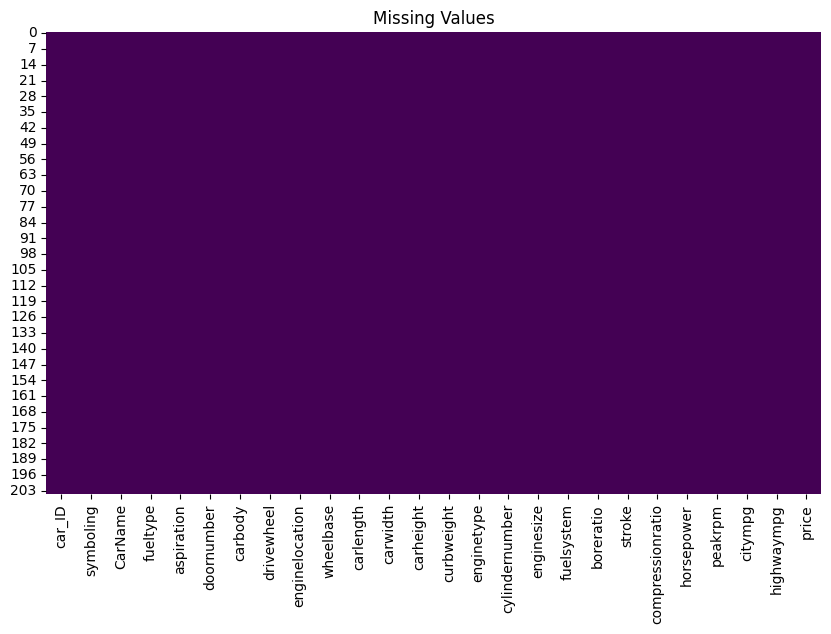

In [6]:
missing_value_analysis = SimpleMissingValuesAnalysis()
missing_value_analysis.analyze(df)

### Data Overview

#### Data Types and Non-null Counts:
The dataset consists of 205 entries and 26 columns. All columns have non-null values, ensuring that there are no missing data points for any of the 205 records. The data types of the columns are as follows:
- **Integer columns**: 8 (e.g., `car_ID`, `symboling`, `curbweight`)
- **Float columns**: 8 (e.g., `wheelbase`, `carlength`, `horsepower`)
- **Object columns**: 10 (e.g., `CarName`, `fueltype`, `doornumber`)

#### Summary Statistics (Numerical Features):
Here’s a breakdown of the key numerical features:

- **Car Dimensions**: 
   - The average `wheelbase` is 98.76 inches, with a standard deviation of 6.02 inches. The minimum and maximum values are 86.6 and 120.9 inches, respectively.
   - The `carlength` has a mean of 174.05 inches and a range from 141.1 inches to 208.1 inches.
   - Other car dimensions like `carwidth` and `carheight` vary between 60.3 to 72.3 inches and 47.8 to 59.8 inches, respectively.

- **Engine and Performance**:
   - The `curbweight` of cars has a mean of 2555.57 lbs, ranging from 1488 to 4066 lbs.
   - The `enginesize` has a mean of 126.91, with values ranging from 61 to 326.
   - The `horsepower` varies from 48 to 288, with an average of 104.12 horsepower.

- **Fuel Efficiency and Price**:
   - The `citympg` (miles per gallon in city conditions) ranges from 13 to 49, with a mean of 25.22 mpg.
   - The `highwaympg` ranges from 16 to 54, with an average of 30.75 mpg.
   - Car prices vary from 5118 to 45400, with a mean price of 13276.71.

#### Summary Statistics (Categorical Features):
- **Car Names**: There are 147 unique car names, with "toyota corona" being the most frequent (6 occurrences).
- **Fuel Type**: Two unique fuel types are present, with "gas" being the most frequent (185 occurrences).
- **Aspiration**: Two categories ("std" and "turbo") with "std" being more common (168 occurrences).
- **Car Body Type**: The dataset includes 5 different body types, with "sedan" being the most frequent (96 occurrences).
- **Drive Wheel**: Three types of drive wheels are represented, with "fwd" (front-wheel drive) being the most common (120 occurrences).
- **Engine Location and Type**: The majority of cars have a front engine location (202 occurrences), and "ohc" (overhead cam) is the most frequent engine type (148 occurrences).

This summary provides a clear understanding of the dataset's structure and key statistics, highlighting the variation in car characteristics, performance, and pricing.


# Missing Values Heatmap Insights

#### ** Colors Represent Missingness:**
- **Yellow**: Represents missing values. The more yellow you see in a column, the more missing data is present in that particular feature.
- **Purple (or dark color)**: Represents non-missing values. Columns that are mostly purple indicate that most of the data is present for that feature.
- Given Dataset has no missing values present to be handled.

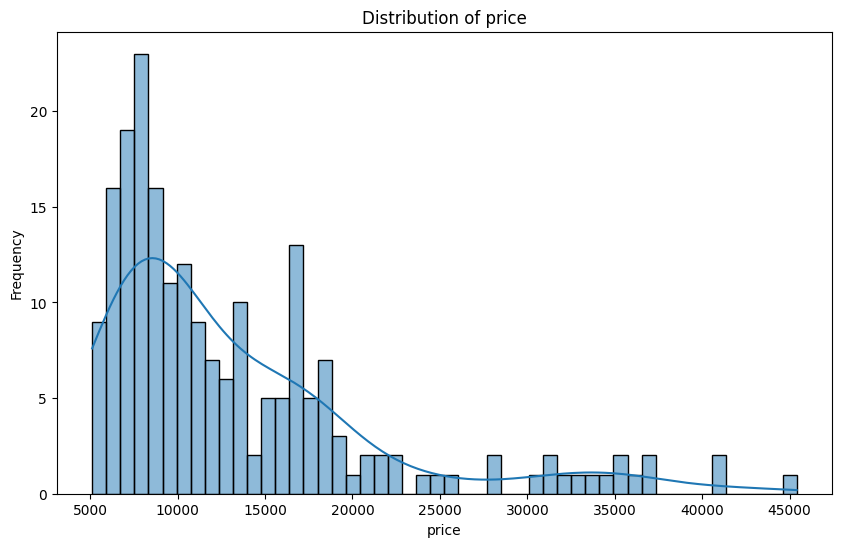

In [7]:
univaiate_analysis = UnivariateAnalysis(NumericalUnivariateAnalysis())
univaiate_analysis.analyze(df,'price')

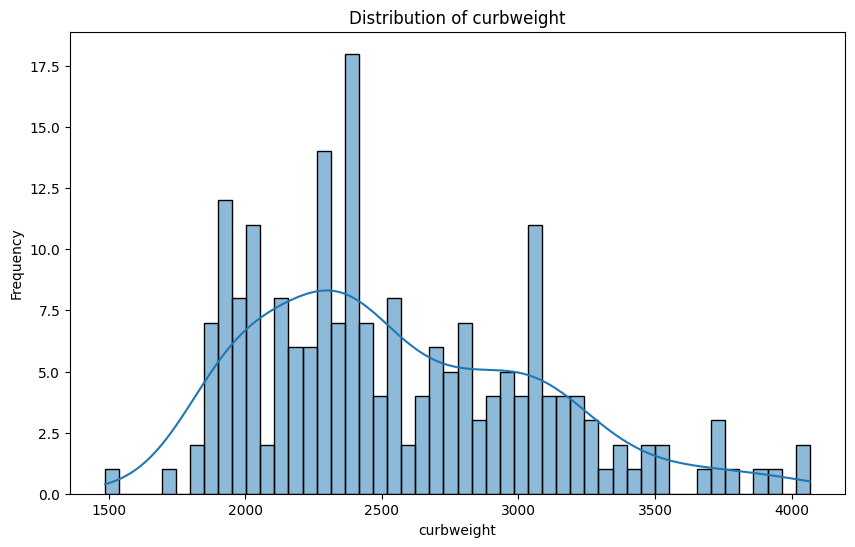

In [8]:
univaiate_analysis.analyze(df,'curbweight')

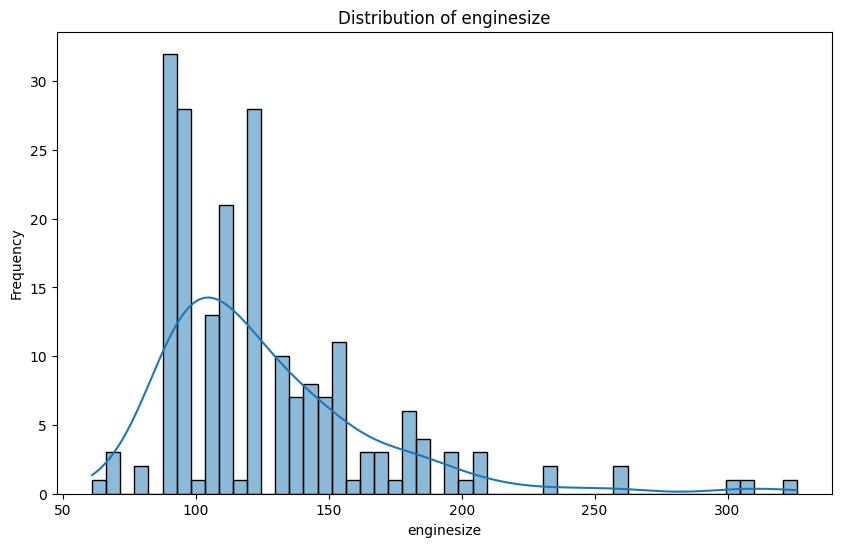

In [9]:
univaiate_analysis.analyze(df,'enginesize')

c:\Users\LAKSHYA PALIWAL\Projects\car-price-prediction\analysis\analyze_src\univariate_analysis.py:23: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=feature,data=df,palette="muted")


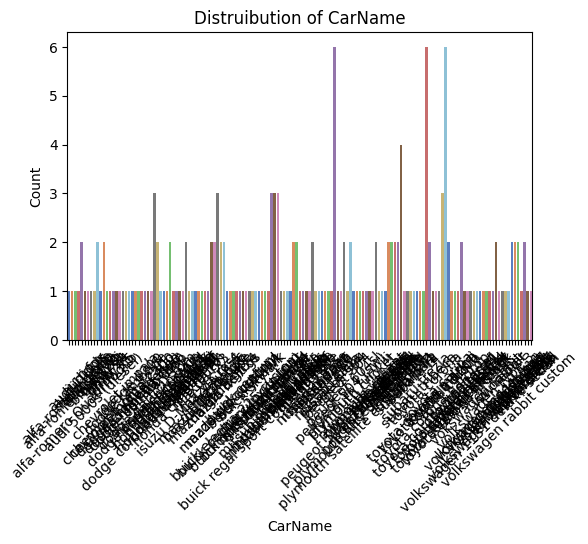

In [10]:
univaiate_analysis.set_strategy(CategoricalUnivariateAnalysis())
univaiate_analysis.analyze(df,'CarName')

c:\Users\LAKSHYA PALIWAL\Projects\car-price-prediction\analysis\analyze_src\univariate_analysis.py:23: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=feature,data=df,palette="muted")


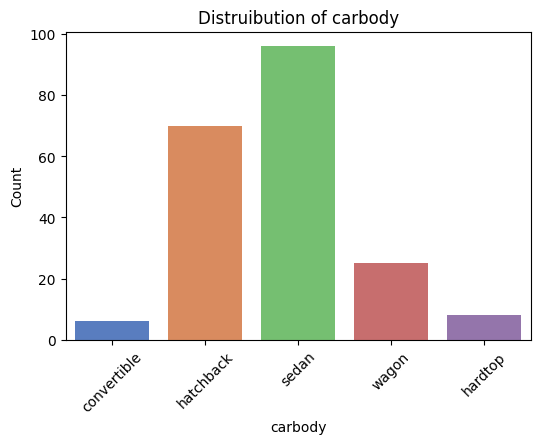

In [11]:
univaiate_analysis.analyze(df,'carbody')

c:\Users\LAKSHYA PALIWAL\Projects\car-price-prediction\analysis\analyze_src\univariate_analysis.py:23: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=feature,data=df,palette="muted")


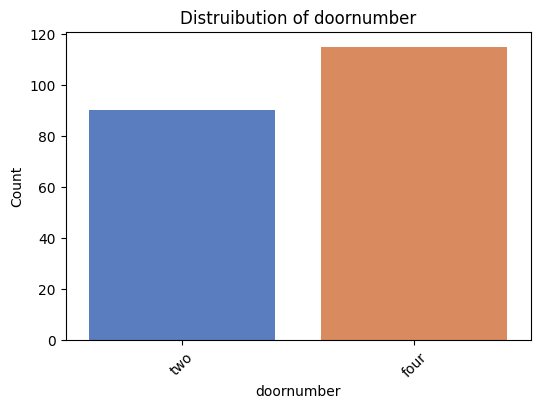

In [12]:
univaiate_analysis.analyze(df,'doornumber')

c:\Users\LAKSHYA PALIWAL\Projects\car-price-prediction\analysis\analyze_src\univariate_analysis.py:23: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=feature,data=df,palette="muted")


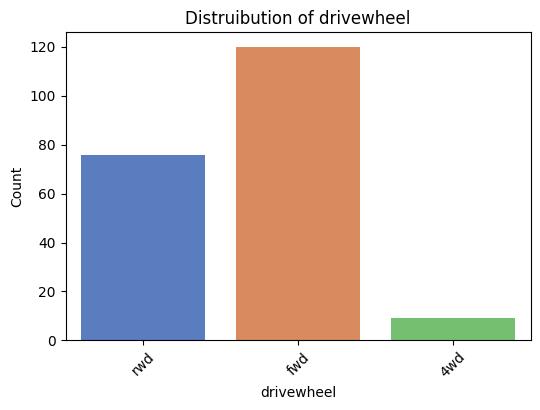

In [13]:
univaiate_analysis.analyze(df,'drivewheel')

c:\Users\LAKSHYA PALIWAL\Projects\car-price-prediction\analysis\analyze_src\univariate_analysis.py:23: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=feature,data=df,palette="muted")


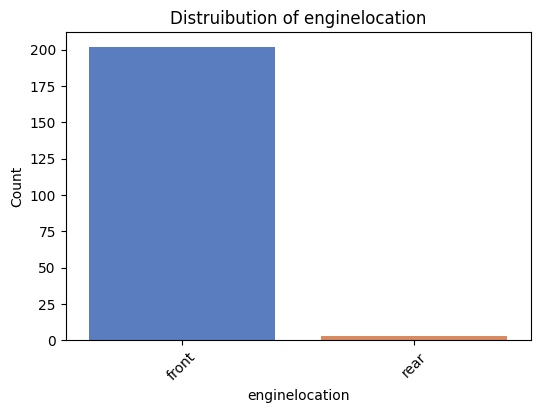

In [14]:
univaiate_analysis.analyze(df,'enginelocation')

c:\Users\LAKSHYA PALIWAL\Projects\car-price-prediction\analysis\analyze_src\univariate_analysis.py:23: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=feature,data=df,palette="muted")


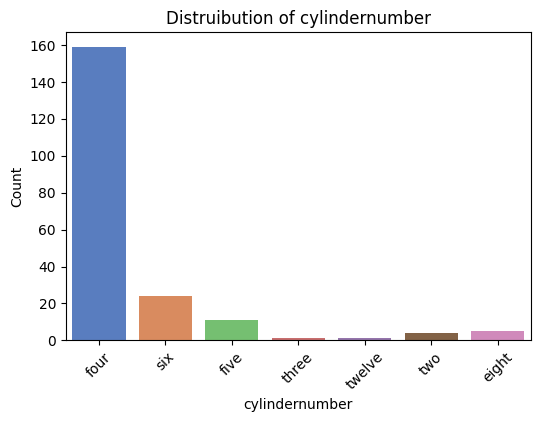

In [15]:
univaiate_analysis.analyze(df,'cylindernumber')

c:\Users\LAKSHYA PALIWAL\Projects\car-price-prediction\analysis\analyze_src\univariate_analysis.py:23: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=feature,data=df,palette="muted")


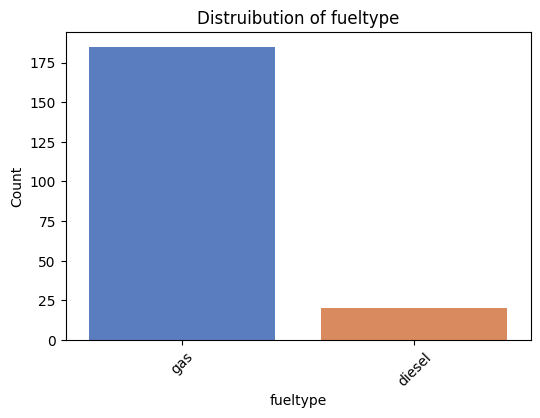

In [16]:
univaiate_analysis.analyze(df,'fueltype')

c:\Users\LAKSHYA PALIWAL\Projects\car-price-prediction\analysis\analyze_src\univariate_analysis.py:23: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=feature,data=df,palette="muted")


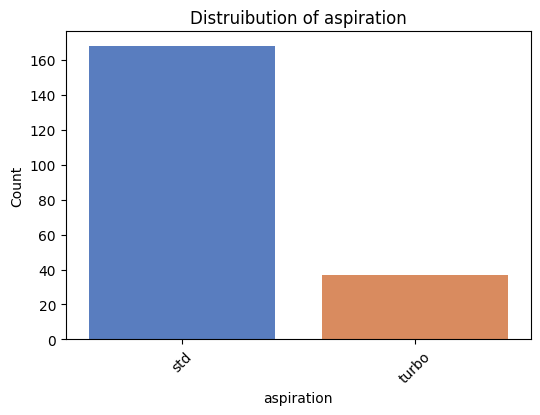

In [17]:
univaiate_analysis.analyze(df,'aspiration')

c:\Users\LAKSHYA PALIWAL\Projects\car-price-prediction\analysis\analyze_src\univariate_analysis.py:23: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=feature,data=df,palette="muted")


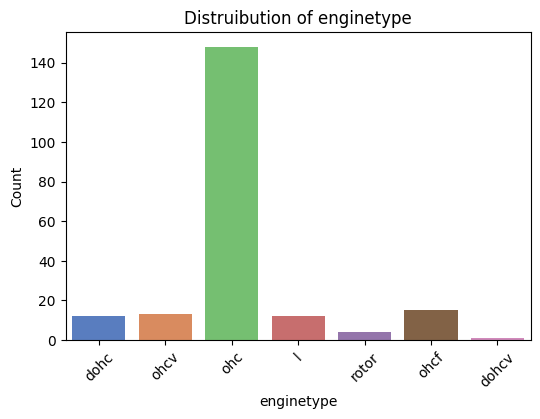

In [18]:
univaiate_analysis.analyze(df,'enginetype')

c:\Users\LAKSHYA PALIWAL\Projects\car-price-prediction\analysis\analyze_src\univariate_analysis.py:23: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=feature,data=df,palette="muted")


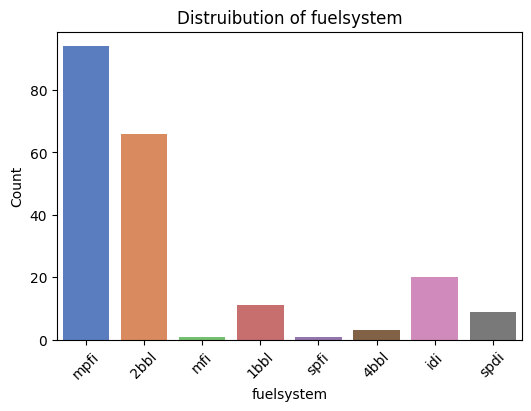

In [19]:
univaiate_analysis.analyze(df,'fuelsystem')

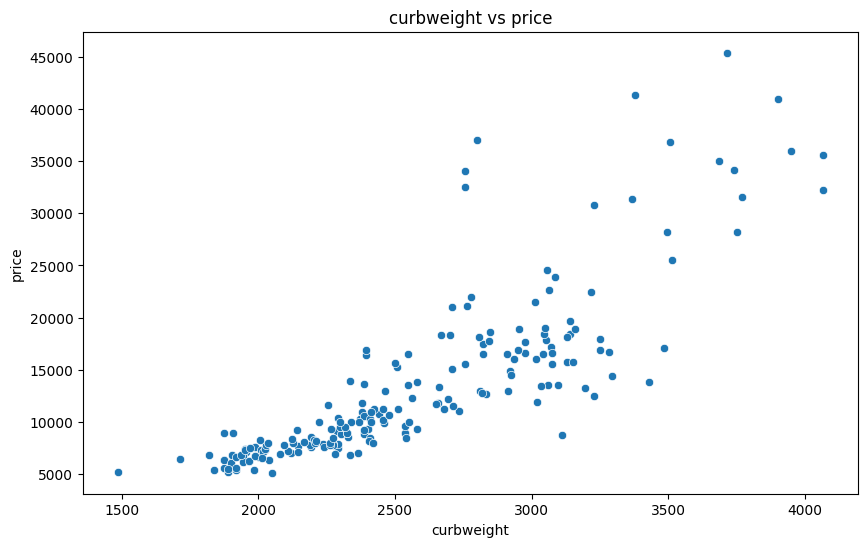

In [41]:
bivariate_analysis = BivariateAnalysis(NumericalVsNumericalAnalysis())
bivariate_analysis.analyze(df, 'curbweight', 'price')

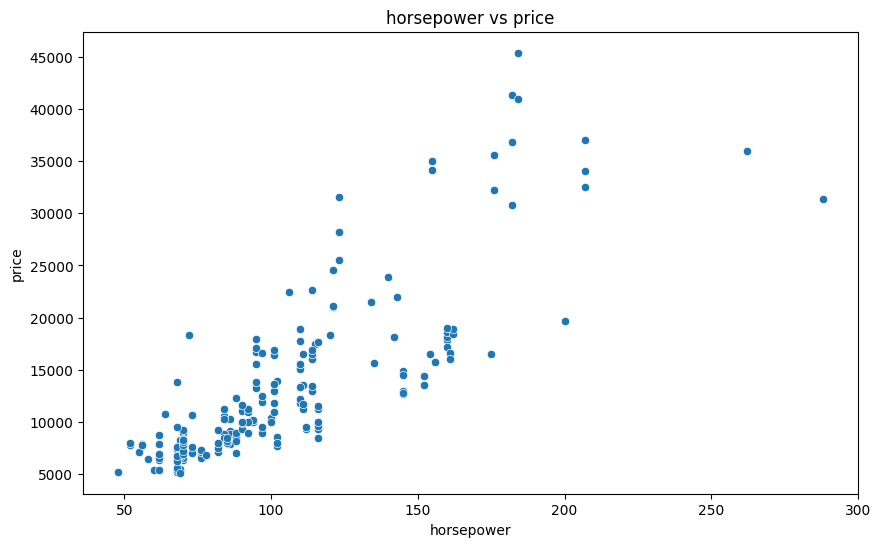

In [42]:
bivariate_analysis.analyze(df, 'horsepower', 'price')

In [ ]:
bivariate_analysis.analyze(df, 'curbweight', 'price')

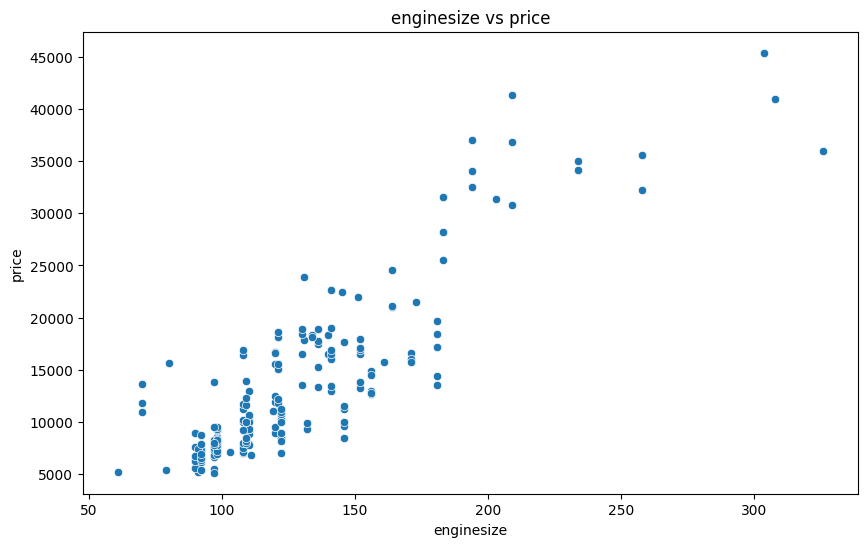

In [21]:
bivariate_analysis.analyze(df, 'enginesize', 'price')

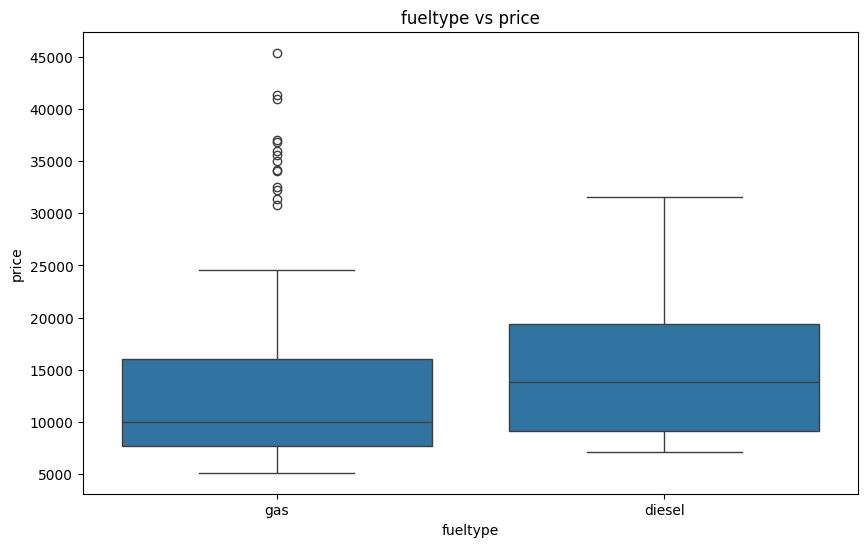

In [22]:
bivariate_analysis.set_strategy(CategoricalVsNumericalAnalysis())
bivariate_analysis.analyze(df, 'fueltype', 'price')

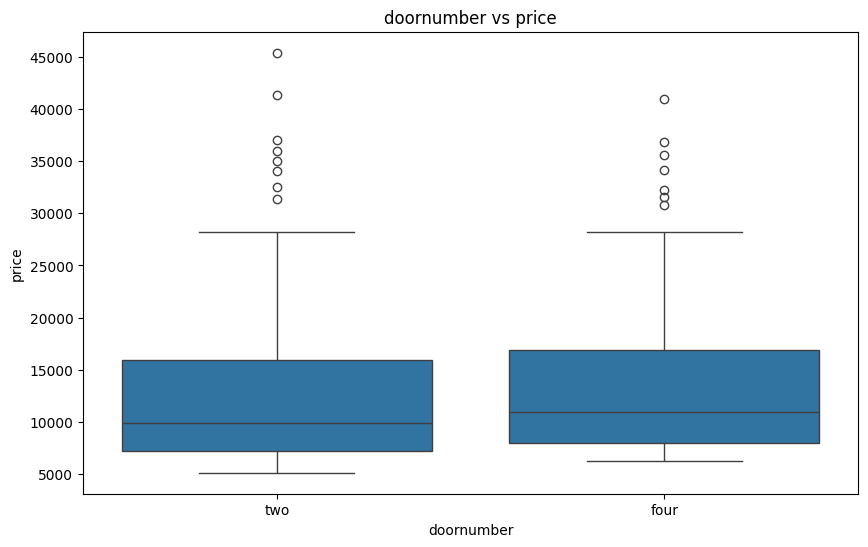

In [23]:
bivariate_analysis.analyze(df, 'doornumber', 'price')

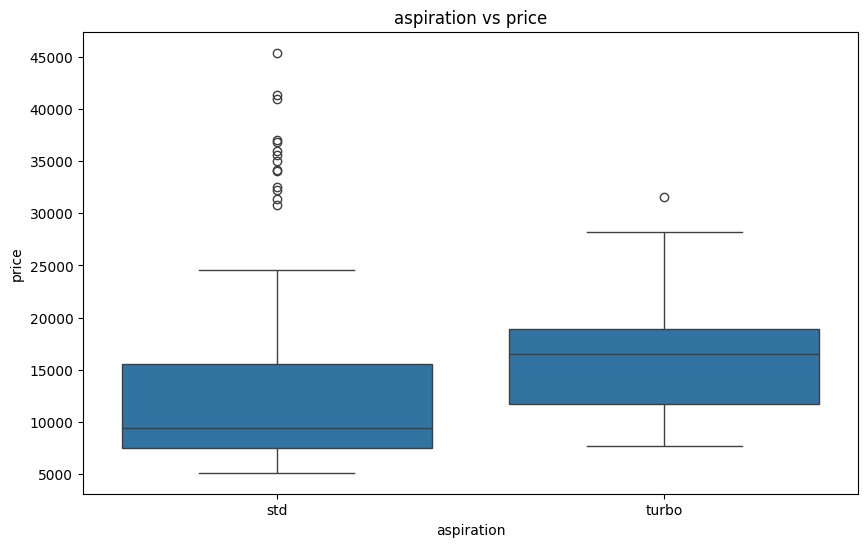

In [24]:
bivariate_analysis.analyze(df, 'aspiration', 'price')

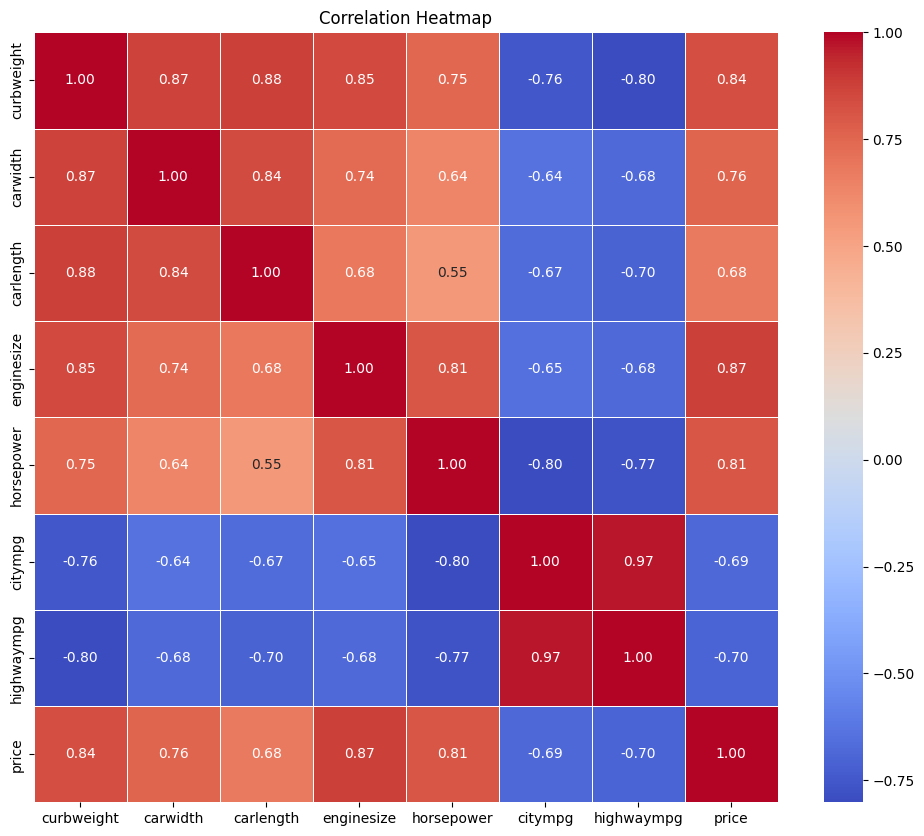

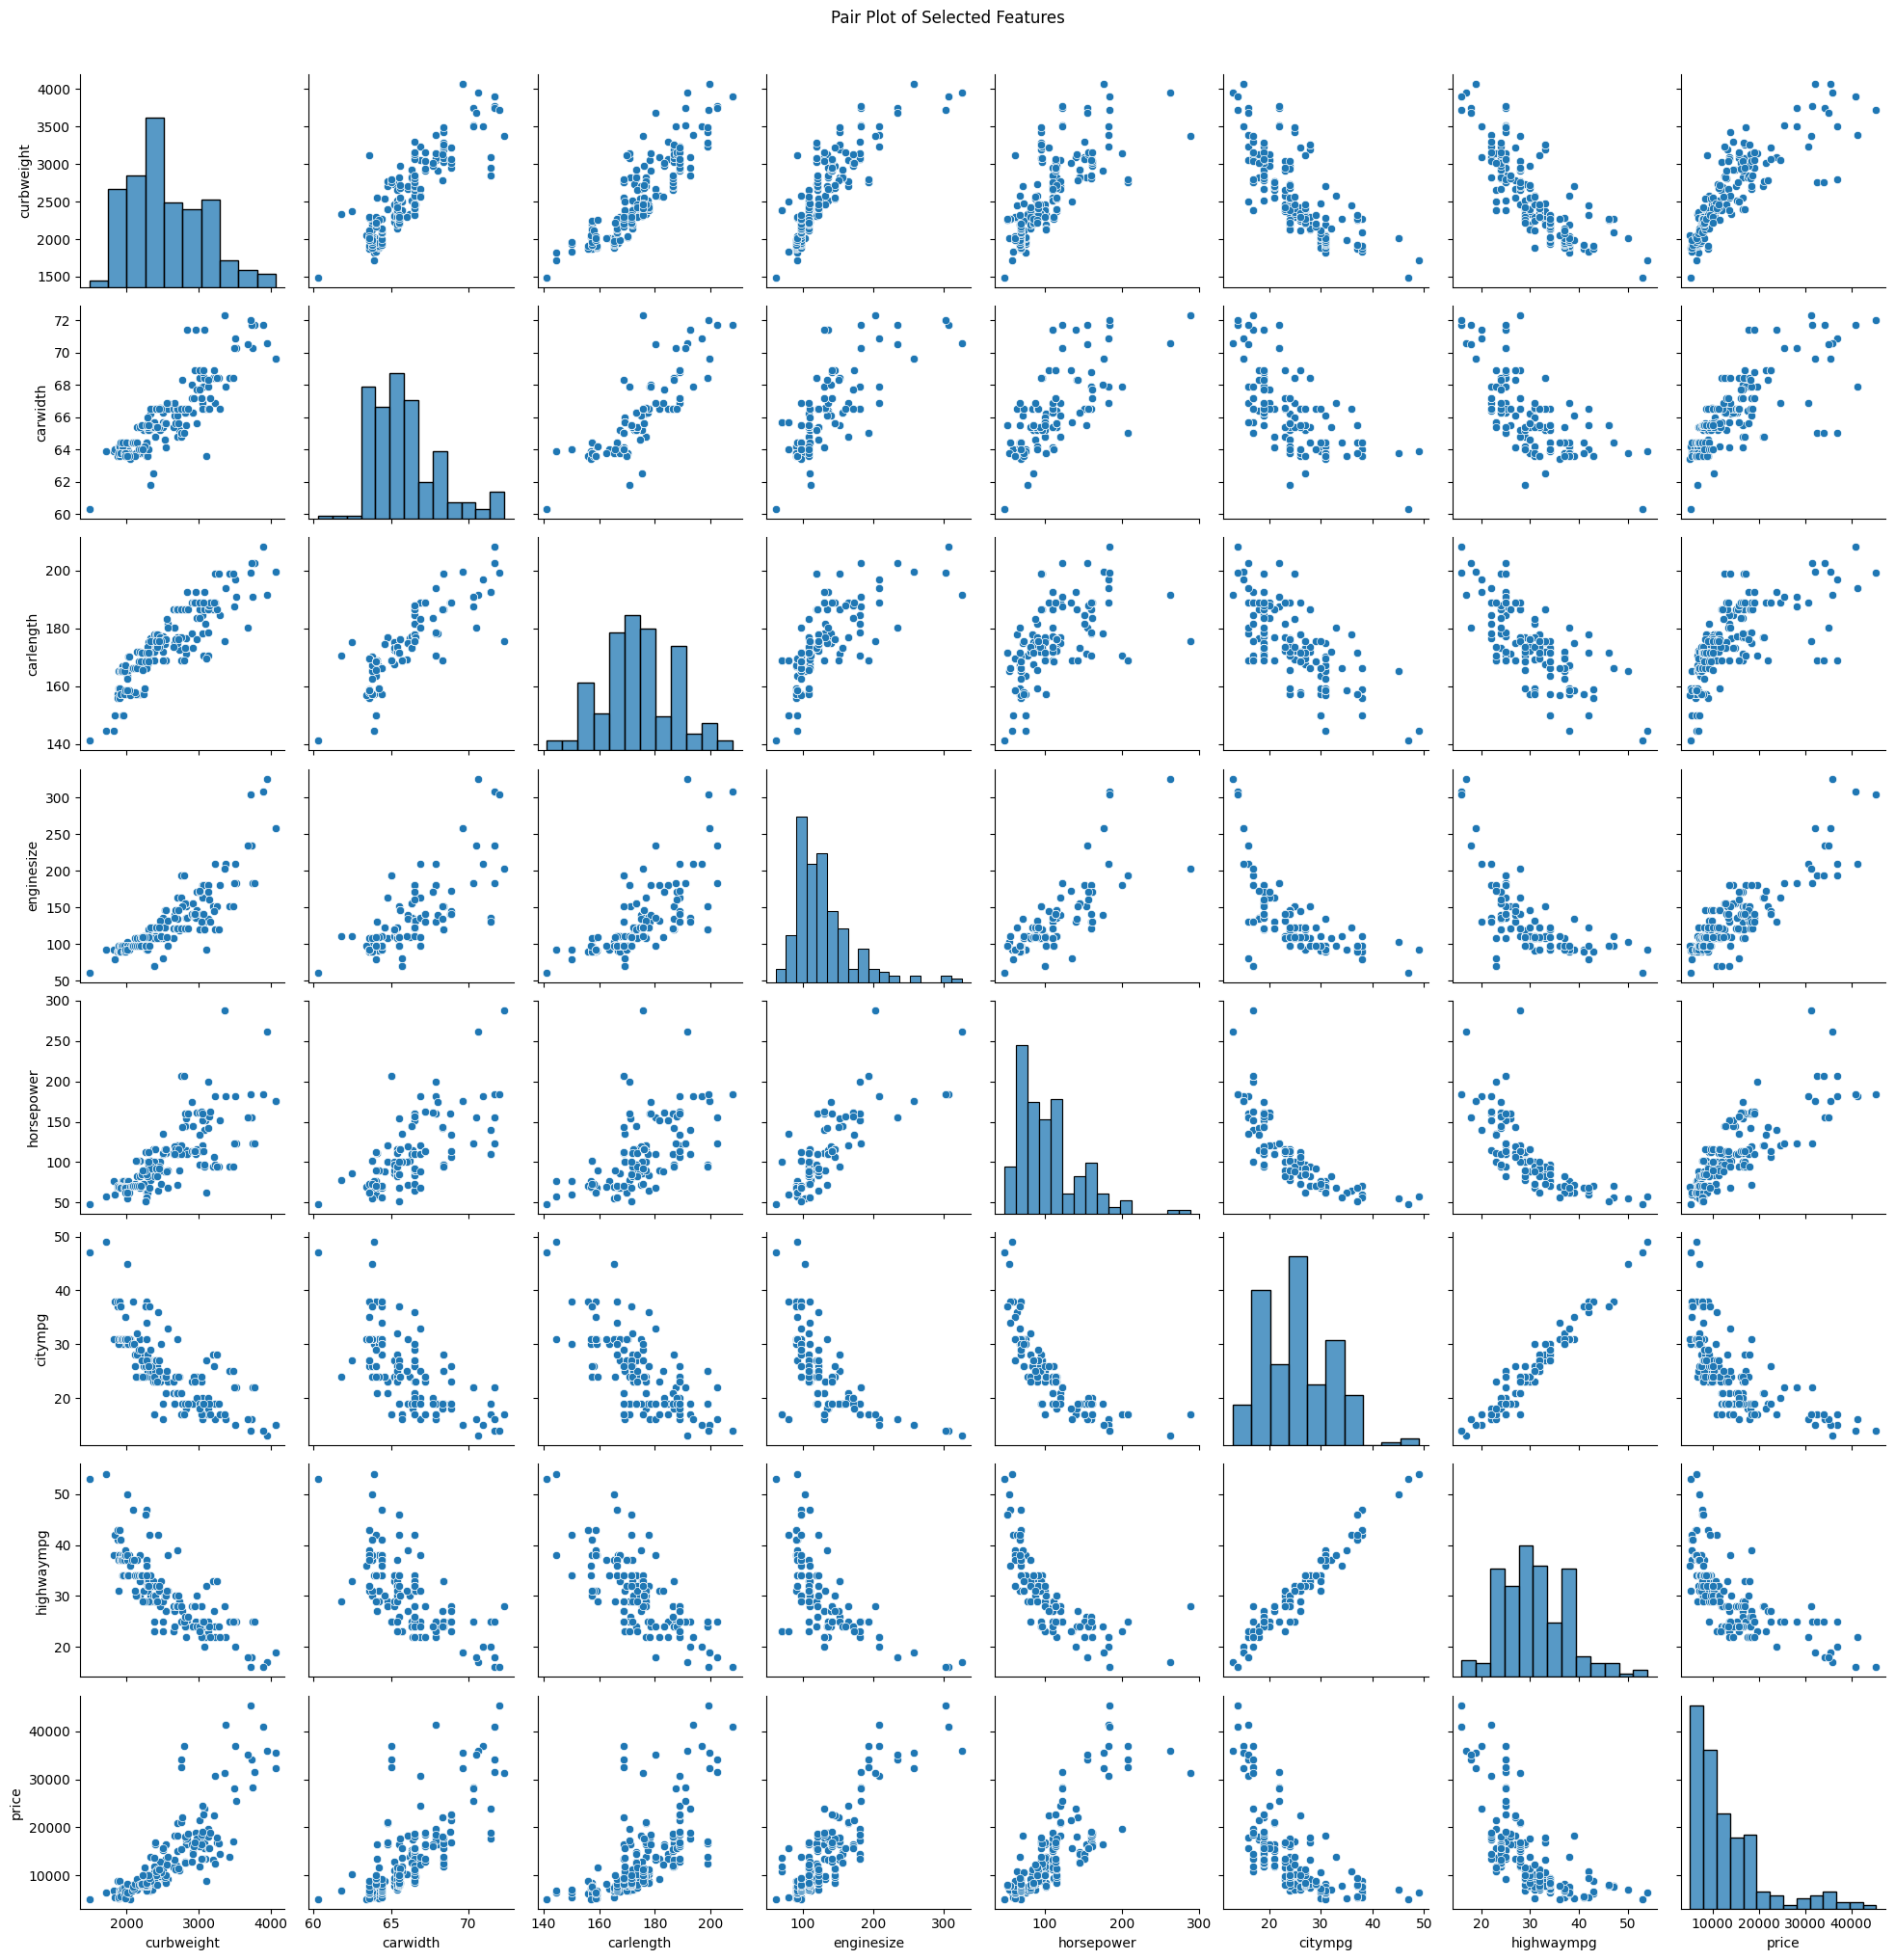

In [40]:
multi_variate_analysis = SimpleMultivariateAnalysis()

multi_variate_analysis.analyze(df[['curbweight', 'carwidth', 'carlength','enginesize', 'horsepower', 'citympg','highwaympg','price']])

## Insights from Data Analysis

### **Univariate Analysis**
- The **price** column is **positively skewed**, with most values falling between **$5,000$ and $20,000$**. There are potential **outliers** that need to be handled using **log transformation**.
- The **engine size** distribution also exhibits **positive skewness**, and a **log transformation** will be applied to normalize it.
- Most cars in the dataset **run on gas**, with a significantly lower number of **diesel** cars.

### **Bivariate Analysis**
- **Price** is **strongly correlated with horsepower**, meaning that cars with **higher horsepower tend to be more expensive**.
- Similarly, **car prices increase** as features like:
  - **Curb weight** (heavier cars cost more)
  - **Car length** (longer cars tend to be pricier)
  - **Car width** (wider cars are generally more premium)
  - **Engine size** (larger engines lead to higher costs)
- There are clear **positive relationships** between price and these key car attributes.

### **Multivariate Analysis**
- The **price column** has **strong positive correlations** with:
  - **Curb weight**
  - **Car length**
  - **Car width**
  - **Engine size**
  - **Horsepower**
- Conversely, **price** has **negative correlations** with:
  - **Highway MPG** (higher fuel efficiency tends to be in more affordable cars)
  - **City MPG** (more fuel-efficient cars tend to have lower prices)
- This indicates that **performance-oriented** and **larger vehicles** are generally **more expensive**, while **fuel-efficient cars** tend to be **cheaper**.

### **Conclusion**
- **Log transformation** is necessary for **price** and **engine size** to handle skewness.
- **Performance and size-related features** are key determinants of **car price**.
- **Fuel efficiency metrics (MPG)** show an **inverse relationship** with car prices, meaning fuel-efficient cars are generally more affordable.
